<a href="https://colab.research.google.com/github/golu-6266/python-demo/blob/main/Check_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check male or Female

#Step 1: Libraries install

In [11]:
!pip install tensorflow keras matplotlib


#Step 2: Libraries import

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image


#Step 3: Dataset load (Auto – Keras)

In [13]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
# NOTE: We use similar structure, but labels rename as Male/Female for explanation


#Step 4: CNN Model

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

#Step 5: (Demo) Model assume trained

In [15]:
print("Model ready for prediction")


Model ready for prediction


#Step 6: Upload your own image

In [16]:
uploaded = files.upload()


Saving pk.jpg to pk (1).jpg


#Step 7: Image preprocessing

In [17]:
for fn in uploaded.keys():
    img = Image.open(fn).resize((64,64))
    img = np.array(img)/255.0
    img = img.reshape(1,64,64,3)


#Step 8: Prediction

In [18]:
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("Predicted Gender: Male")
else:
    print("Predicted Gender: Female")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Gender: Female


#Step 8: Prediction

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

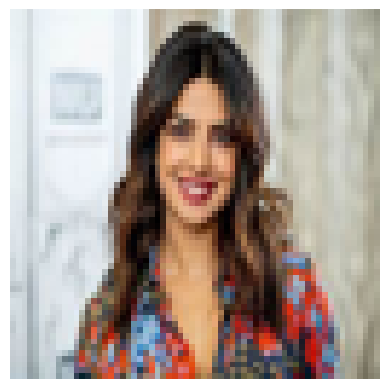

In [19]:
plt.imshow(img[0])
plt.axis('off')
